In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Difdoug\Difdoug_AL_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,0.042485,1.97890,1.83630,2.88660,2.46960,0.21541,3.09000,0.78343,0.51035,0.03043,0.100660
1,0.029389,0.206580,0.48861,1.43430,3.12990,1.27780,1.42850,0.14333,1.19480,2.13180,0.98473,3.844500
2,NaN,0.217560,1.61050,NaN,3.76820,1.21000,3.99630,2.21730,3.90290,1.51440,2.43890,NaN
3,-0.539160,-0.061874,0.36486,0.33278,0.19027,0.56716,1.66010,2.35270,0.66126,3.13510,3.93810,3.734600
4,-0.268400,-1.006000,2.88220,1.56160,3.20140,3.37740,1.52260,0.98475,3.10940,3.65640,3.91720,0.947060
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,NaN,3.72580,3.70480,NaN,NaN,1.62780,3.29400,1.08500,0.15740,0.46504,2.851400
396,0.264630,-6.107600,3.90540,1.33770,1.41870,1.68610,1.09510,3.79360,0.12790,0.54249,3.36580,3.755600
397,-3.479100,-1.993300,1.32480,1.77210,2.55090,NaN,0.92540,1.84110,NaN,NaN,1.52630,2.123800
398,7.293000,-0.411470,2.49480,0.39655,2.99900,3.41010,2.95160,0.27800,0.99059,3.43740,1.81620,0.087212


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	6
float64		column 2	12
float64		column 3	7
float64		column 4	43
float64		column 5	18
float64		column 6	24
float64		column 7	12
float64		column 8	6
float64		column 9	24
float64		column 10	12
float64		column 11	24
float64		column 12	31


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,394.000000,388.000000,393.000000,357.000000,382.000000,376.000000,388.000000,394.000000,376.000000,388.000000,376.000000,369.000000
mean,-0.110645,0.109929,2.042253,1.935291,1.905091,1.984431,2.038682,1.983942,1.966100,2.027448,1.952539,1.928294
std,2.574741,2.768806,1.136030,1.148392,1.164206,1.145681,1.161125,1.145145,1.152853,1.163871,1.155313,1.191351
min,-7.771000,-6.828400,0.005583,0.005376,0.000530,0.018503,0.003618,0.007321,0.007019,0.055837,0.006786,0.001972
25%,-0.688645,-0.791275,1.119200,0.983670,0.868170,1.044075,1.030075,1.022200,0.983505,1.035350,0.909745,0.890270
50%,-0.074609,0.050280,2.093200,1.795600,1.864250,2.021800,2.114850,1.966950,2.108850,2.073750,1.902000,1.886400
75%,0.753763,0.986513,2.997600,2.890700,2.948575,2.966250,2.998250,3.038500,2.933775,3.062225,2.965275,2.949700
max,8.409300,6.777100,3.976400,3.993400,3.979000,3.992300,3.996300,3.995000,3.985500,3.984300,3.967600,3.996000


<AxesSubplot:>

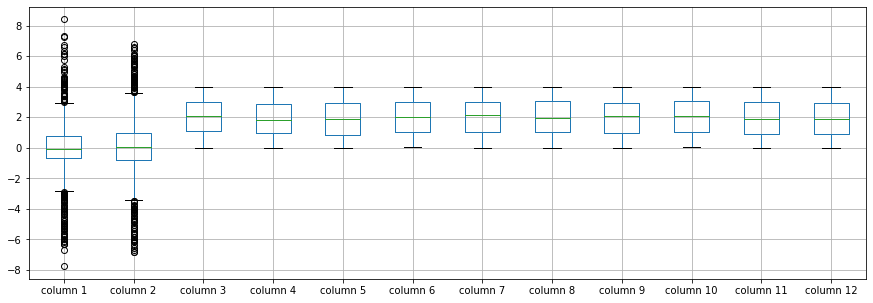

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    -0.110645
column 2     0.109929
column 3     2.042253
column 4     1.935291
column 5     1.905091
column 6     1.984431
column 7     2.038682
column 8     1.983942
column 9     1.966100
column 10    2.027448
column 11    1.952539
column 12    1.928294
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,0.034603,-0.041943,-0.095303,0.016857,-0.015160,-0.007227,0.014395,-0.026686,0.048216,0.096937,-0.031274
column 2,0.034603,1.000000,-0.035191,0.069116,-0.093645,-0.075884,0.009237,-0.024156,-0.030291,0.019167,-0.004314,0.066718
column 3,-0.041943,-0.035191,1.000000,-0.022589,-0.033864,-0.050112,-0.087008,0.084023,0.121455,-0.031773,-0.083477,0.003774
column 4,-0.095303,0.069116,-0.022589,1.000000,-0.009513,0.113778,0.020226,0.068751,-0.039173,0.065641,-0.018916,-0.045407
column 5,0.016857,-0.093645,-0.033864,-0.009513,1.000000,0.083789,0.024767,0.028113,-0.011011,0.032431,-0.010817,-0.042591
column 6,-0.015160,-0.075884,-0.050112,0.113778,0.083789,1.000000,-0.001985,0.085723,0.008044,-0.006219,0.023086,-0.067384
column 7,-0.007227,0.009237,-0.087008,0.020226,0.024767,-0.001985,1.000000,-0.029919,0.087022,0.040167,0.031211,-0.069324
column 8,0.014395,-0.024156,0.084023,0.068751,0.028113,0.085723,-0.029919,1.000000,0.057299,-0.144258,-0.037918,-0.023348
column 9,-0.026686,-0.030291,0.121455,-0.039173,-0.011011,0.008044,0.087022,0.057299,1.000000,0.024016,0.016087,0.034376
column 10,0.048216,0.019167,-0.031773,0.065641,0.032431,-0.006219,0.040167,-0.144258,0.024016,1.000000,-0.007664,0.038229


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [12,12+30,12+30+30,12+30+30+30,12+30+30+30+30,12+30+30+30+30+30,12+30+30+30+30+30+30,12+30+30+30+30+30,12+30+30+30+30,12+30+30+30,12+30+30,12+30,12], vae_layer = False, seed = 30)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 26.706549530029296
Epoch: 1 , loss: 26.641199264526367
Epoch: 2 , loss: 26.56804412841797
Epoch: 3 , loss: 26.5302774810791
Epoch: 4 , loss: 26.459511642456054
Epoch: 5 , loss: 26.316238021850587
Epoch: 6 , loss: 25.6786181640625
Epoch: 7 , loss: 22.771884841918947
Epoch: 8 , loss: 21.32503158569336
Epoch: 9 , loss: 20.92539253234863
Epoch: 10 , loss: 20.66109733581543
Epoch: 11 , loss: 20.315280685424806
Epoch: 12 , loss: 19.602475967407226
Epoch: 13 , loss: 20.085989532470702
Epoch: 14 , loss: 19.74044403076172
Epoch: 15 , loss: 19.570982513427733
Epoch: 16 , loss: 19.486729202270507
Epoch: 17 , loss: 19.108157119750977
Epoch: 18 , loss: 19.19229965209961
Epoch: 19 , loss: 19.02598892211914
Epoch: 20 , loss: 19.050732650756835
Epoch: 21 , loss: 19.078781356811522
Epoch: 22 , loss: 18.785418395996093
Epoch: 23 , loss: 18.648918380737303
Epoch: 24 , loss: 18.726111602783202
Epoch: 25 , loss: 18.5839987

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(400, 12)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    -0.705950
column 2     0.128930
column 3     1.058100
column 4     1.581669
column 5     2.148600
column 6     2.245800
column 7     1.685819
column 8     2.227200
column 9     1.943500
column 10    1.987000
column 11    1.640201
column 12    0.368260
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Difdoug.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000
1,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000
2,1.134944,0.000000,0.0,1.59114,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,2.268373
3,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000
4,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.000000,4.778903,0.0,0.00000,0.067882,0.652615,0.0,0.0,0.000000,0.000000,0.0,0.000000
396,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000
397,0.000000,0.000000,0.0,0.00000,0.000000,0.133914,0.0,0.0,-1.920321,0.653054,0.0,0.000000
398,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(22.193653593419164, 163.27447192538312)

In [17]:
NRMS=numerator/denominator
NRMS


0.1359284971600565

In [18]:
new_df.iloc[66,:]

column 1     0.82272
column 2     0.26776
column 3     0.40343
column 4     1.18720
column 5     3.95660
column 6     2.58300
column 7     2.83060
column 8     3.07420
column 9     1.53810
column 10    0.24620
column 11    0.85334
column 12    3.60440
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,0.042485,1.97890,1.83630,2.886600,2.469600,0.21541,3.09000,0.783430,0.510350,0.03043,0.100660
1,0.029389,0.206580,0.48861,1.43430,3.129900,1.277800,1.42850,0.14333,1.194800,2.131800,0.98473,3.844500
2,0.019544,0.217560,1.61050,2.92824,3.768200,1.210000,3.99630,2.21730,3.902900,1.514400,2.43890,2.901953
3,-0.539160,-0.061874,0.36486,0.33278,0.190270,0.567160,1.66010,2.35270,0.661260,3.135100,3.93810,3.734600
4,-0.268400,-1.006000,2.88220,1.56160,3.201400,3.377400,1.52260,0.98475,3.109400,3.656400,3.91720,0.947060
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,0.049703,3.72580,3.70480,0.950572,1.006675,1.62780,3.29400,1.085000,0.157400,0.46504,2.851400
396,0.264630,-6.107600,3.90540,1.33770,1.418700,1.686100,1.09510,3.79360,0.127900,0.542490,3.36580,3.755600
397,-3.479100,-1.993300,1.32480,1.77210,2.550900,1.604014,0.92540,1.84110,1.556979,1.608014,1.52630,2.123800
398,7.293000,-0.411470,2.49480,0.39655,2.999000,3.410100,2.95160,0.27800,0.990590,3.437400,1.81620,0.087212


In [20]:
imputations[-1].to_excel("Difdoug_AL_5(imp).xlsx", index=False, header=False)